# Data Visualization

When our data is low-dimensional (or when we care about pairwise combinations of data), visualizing it is a great way to get an overall idea of how the data is behaving.  It will help us inspect how well any models we create actually fit the data, and will also give us a tool to visually find potentially outliers.  These are the two main visualization tools we are going to use:
1. Matplotlib.  One of the most commonly used graphing tools, matplotlib produces excellent static 2d and 3d plots.
2. Bokeh. Bokeh focuses on interactive graphs, that allow for mouseover, panning, zooming, and selecting.

Both packages allow embedding of graphs directly into Jupyter notebooks, as well as providing the option of outputting graphs as files; matplotlib outputs as picture files (.png, etc.), while Bokeh outputs as HTML files.

In [1]:
import pandas as pd
import numpy as np

## Matplotlib
Our first step will be to import matplotlib, and then tell it to show the graphs we make *inside* the notebooks (instead of opening in a separate window/program).  Then we tell it how large a picture to show:

In [2]:
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (12.0, 10.0)

Populating the interactive namespace from numpy and matplotlib


### Basic Plots

We'll start with very basic plotting; this requires very little code, but also does not give us much control over the format of the output.

In [3]:
df1 = pd.DataFrame({'A':np.random.randint(75,200,50),'B':np.random.randint(0,25,50),'C':np.random.randint(-50,15,50)})
df1.head(10)

,A,B,C
0,135,4,-13
1,184,8,-47
2,122,6,-26
3,77,4,-33
4,110,21,-37
5,94,0,-45
6,91,18,8
7,130,2,-46
8,118,15,-13
9,89,7,-7


We can plot a single column by calling `.plot()` on the column object:

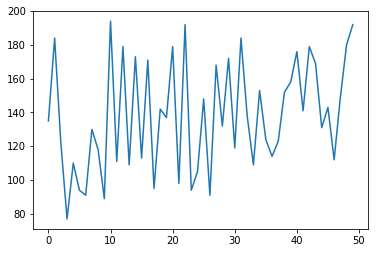

In [4]:
df1['A'].plot();

By default, using `.plot()` will connect individual data points with lines to create a continuous graph.  If we do not specify colours, matplotlib will decide colours for us.  We can plot all three columns at the same time by simply calling the dataframe:

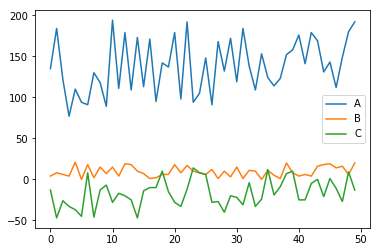

In [5]:
df1.plot();

The reason we put a ; at the end of the plot command is it gets rid of an object identifier that is normally printed, and makes the presentation cleaner.  Without it, we get:

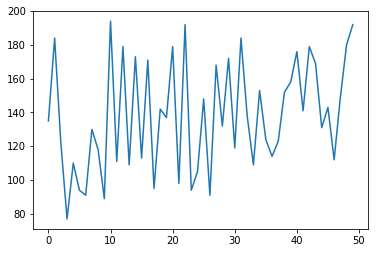

In [6]:
df1['A'].plot()

We can do some customization by feeding the function various arguments, including specifying a title, color, and telling it to put a legend (even if there's only one graph).

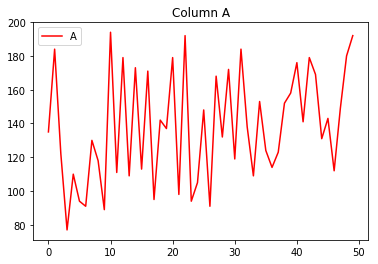

In [7]:
df1['A'].plot(title='Column A',legend=True, color='red')

If we didn't want a continuous graph, we could use the `.scatter()` to see just the data points.  This works slightly differently to the `.plot()` command, in that `scatter()` is a function that takes two arguments:  the independent variable (in this case, our dataframe's index), and the dependent variable (any of the columns we want).

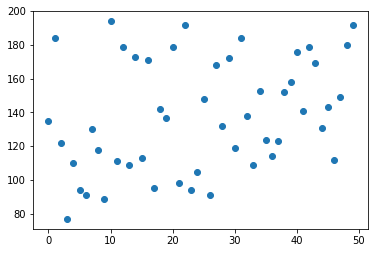

In [8]:
scatter(df1.index,df1['A']);

### Types of Graphs, Uses

We've seen two types of graphs so far:  scatter plots and line graphs.  For what kind of data should we use these graphs?  Here are general guidelines:

1. **Line graphs** are good for visualizing data that are continuously connected in some way, e.g.: temperature changing over time.
2. **Scatter plots** are useful for data points that are individually separate and distinct, e.g.: the house price vs square footage data we saw in Unit 1.

In [9]:
dfhp = pd.DataFrame({'House Price':[284, 302, 376, 372, 341, 385, 361, 345, 371, 317, 337, 404, 408, 367, 486, 402, 
                                    477, 475, 455, 456, 492, 515, 535, 567, 519, 580, 534, 539, 550, 618, 589, 624, 
                                    566, 630, 624, 596, 634, 639, 721, 690, 688, 751, 777, 798, 821, 781, 800, 797, 803, 
                                    898]}, index=[1710, 1737, 1767, 1779, 1791, 1810, 1819, 1825, 1869, 1896, 1963, 2047, 
                                                  2060, 2201, 2328, 2337, 2465, 2498, 2538, 2577, 2579, 2671, 2680, 2758, 
                                                  2831, 2866, 3018, 3053, 3084, 3106, 3133, 3143, 3156, 3159, 3169, 3247, 
                                                  3384, 3391, 3528, 3537, 3596, 3790, 3811, 3970, 4025, 4046, 4204, 4211, 
                                                  4274, 4410])
dfhp.index.name = 'Square Footage'
dfhp.head()

,House Price
Square Footage,
1710,284
1737,302
1767,376
1779,372
1791,341


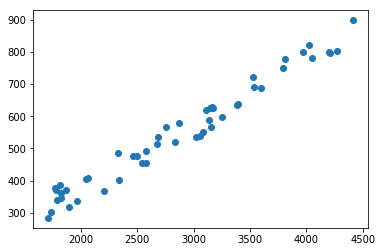

In [10]:
scatter(dfhp.index,dfhp['House Price']);

We can very easily visualize the data this way, because each data point shows the values for a particular house, but the houses aren't related to each other in any sense.  It would be much more confusing to view the graph like this:

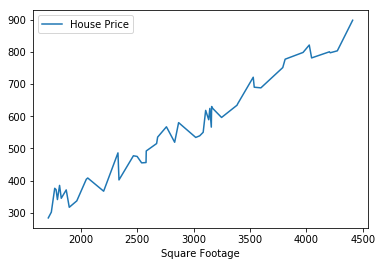

In [11]:
dfhp.plot()

It's not really clear what we're looking at there.

Looking at temperature data, however, which is continually changing as time goes on:

In [12]:
dftp = pd.DataFrame({'Temp':[10.1, 9.7, 10.4, 10.4, 12.2, 12.8, 13.3, 13.1, 13.8, 13.3, 14.6, 14.7, 14.1, 15.8, 15.8, 
                             16.2, 16.4, 16.0, 15.9, 17.9, 16.6, 17.5, 17.4, 18.2, 18.1, 17.3, 18.6, 18.7, 17.5, 17.2,
                             17.2, 17.3, 18.2, 17.9, 18.1, 17.7, 16.9, 18.3, 17.0, 16.3, 17.4, 15.7, 15.4, 15.2, 15.7,
                             15.7, 15.0, 14.0, 14.8]},
                    index=pd.date_range('2017-05-01 08:00:00',periods =49,freq='0.25H'))
dftp.head()

,Temp
2017-05-01 08:00:00,10.1
2017-05-01 08:15:00,9.7
2017-05-01 08:30:00,10.4
2017-05-01 08:45:00,10.4
2017-05-01 09:00:00,12.2


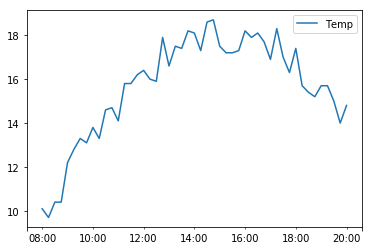

In [13]:
dftp.plot();

This plot makes more sense to look at, as we can see the connections between the data points we have.

There are many other kinds of graphs available in Matplotlib, such as histograms:

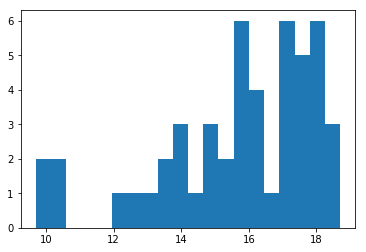

In [14]:
hist(dftp['Temp'],bins=20);

This kind of graph effectively counts the number of values the data set has.  

For an overview of the kinds of graphs available, visit the Matplotlib examples gallery:  https://matplotlib.org/gallery.html

### Multiple Plots

If we run three separate scatter commands, one for each of the columns, Python will automatically place them in the same graph because they all share the same index (independent variable).

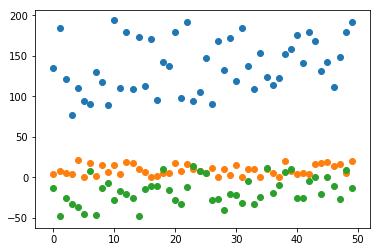

In [15]:
scatter(df1.index,df1['A']);
scatter(df1.index,df1['B']);
scatter(df1.index,df1['C']);

Similarly, we can get equivalent plotting with the `.plot()` command by either specifying a list of columns to use, or using sequential plot commands:

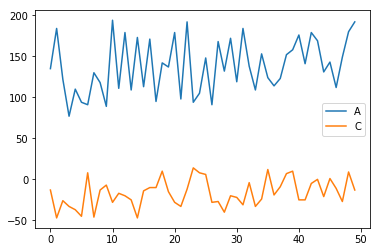

In [16]:
df1[['A','C']].plot();

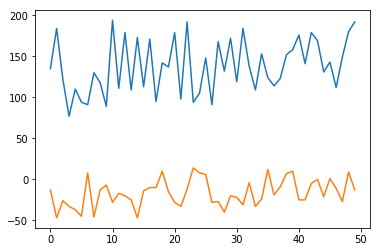

In [17]:
df1['A'].plot();
df1['C'].plot();

If we had two different dataframes (distinct indices), however, and called sequential plots, we would get:

In [18]:
df = pd.DataFrame({'X':np.random.randint(0,100,30)},index=pd.date_range('2016-01-01',periods=30,freq='h'))

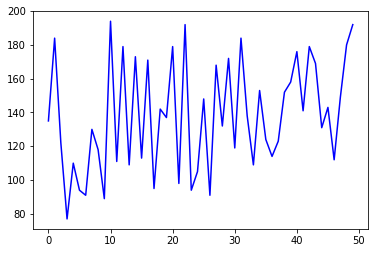

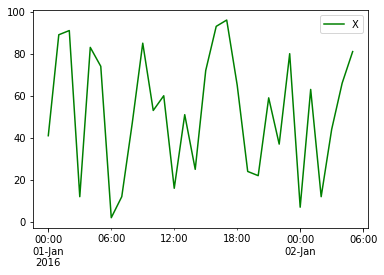

In [19]:
df1['A'].plot(color='blue')
df.plot(color='green')

### More Advanced Plots

While the methods of plotting we have seen so far are very handy for getting a quick insight into our data sets, Matplotlib allows us much finer control over graphing.  The code becomes a little more complicated, and has the following format:

`fig = plt.figure()  # declare a figure to a variable name
plt.plot(x, y1, label='name1', color='colorname or hex code')
plt.plot(x, y2, label='name2', color='colorname or hex code')  # repeat for as many things as you are plotting
plt.xlabel('label for x', size=number)
plt.ylabel('label for y', size=number)
plt.legend()
plt.grid()  # If this is included, a grid will be placed on your graph
plt.title('Title')
plt.show()`

Let's use our dataframe `d1` to create a plot:  we will label the y-axis 'Price', the x-axis 'Days After First Trade', and the title of the plot will be 'Stock Prices'.  We'll set the grid to `True` to show a grid on the graph.

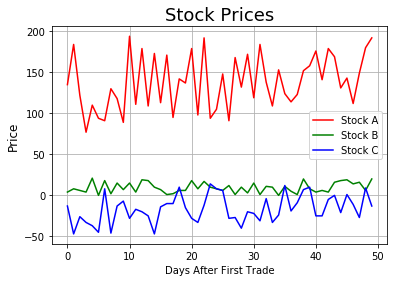

In [22]:
fig = plt.figure()
plt.plot(df1.index,df1['A'],label='Stock A', color='red')
plt.plot(df1.index,df1['B'],label='Stock B', color='green')
plt.plot(df1.index,df1['C'],label='Stock C', color='blue')
plt.xlabel('Days After First Trade', size=10)
plt.ylabel('Price',size=12)
plt.legend()
plt.title('Stock Prices',size=18)
plt.grid(b=True)
plt.show()

That looks much fancier.  We notice that there are some gaps on either end of the graph; we can fix this by telling Matplotlib exactly what range to graph from, using the `plt.xlim()` command.  We'll tell it to graph from 0 to 49, because those are the limits of our data.

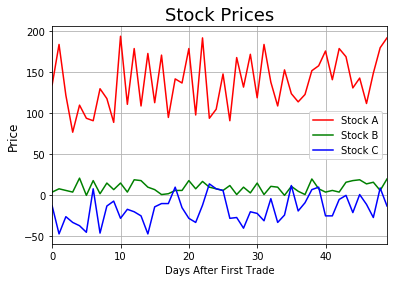

In [23]:
fig = plt.figure()
plt.plot(df1.index,df1['A'],label='Stock A', color='red')
plt.plot(df1.index,df1['B'],label='Stock B', color='green')
plt.plot(df1.index,df1['C'],label='Stock C', color='blue')
plt.xlabel('Days After First Trade', size=10)
plt.ylabel('Price',size=12)
plt.legend()
plt.title('Stock Prices',size=18)
plt.grid()
plt.xlim(0,49)
plt.show()

Usually when we graph things, we like to clearly label the x-axis along `x=0`.  We can do that by telling Matplotlib to plot a black line whose x-value is the `df1.index`, and the y-value is `0*df1.index`.

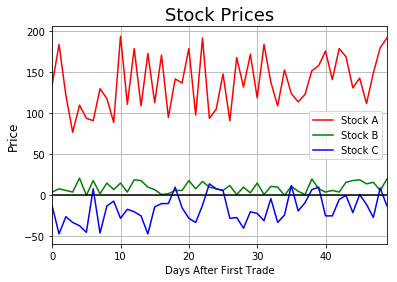

In [24]:
fig = plt.figure()
plt.plot(df1.index,df1['A'],label='Stock A', color='red')
plt.plot(df1.index,df1['B'],label='Stock B', color='green')
plt.plot(df1.index,df1['C'],label='Stock C', color='blue')
plt.plot(df1.index,0*df1.index,color='black')
plt.xlabel('Days After First Trade', size=10)
plt.ylabel('Price',size=12)
plt.legend()
plt.title('Stock Prices',size=18)
plt.grid()
plt.xlim(0,49)
plt.show()

We can also control the style in which these lines are graphed.  As an additional argument between y-axis and the label, we can specify the `linestyle`.  The four choices are `'-', '--', '-.', `and` ':'` which are solid, dashed, dash-dot, and dotted lines, respectively.  Let's change both the linestyle and the linewidth of each of the `df1` columns:

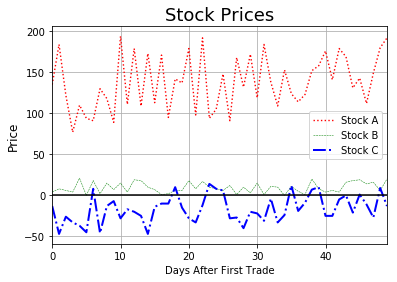

In [25]:
fig = plt.figure()
plt.plot(df1.index,df1['A'],':',label='Stock A', color='red',linewidth=1.4)
plt.plot(df1.index,df1['B'],'--',label='Stock B', color='green',linewidth=0.5)
plt.plot(df1.index,df1['C'],'-.',label='Stock C', color='blue',linewidth=2)
plt.plot(df1.index,0*df1.index,color='black')
plt.xlabel('Days After First Trade', size=10)
plt.ylabel('Price',size=12)
plt.legend()
plt.title('Stock Prices',size=18)
plt.grid(b=True)
plt.xlim(0,49)
plt.show()

### Date Formatting

Let us read in the `timeseries_1.csv` data set again, and do some date formatting:

In [26]:
df2 = pd.read_csv('timeseries_1.csv',index_col=0,parse_dates=True)
df2.head()

,open,high,low,close,volume
2014-02-01 08:00:00,748.1,748.2,746.7,746.8,39470
2014-02-01 08:01:00,746.9,747.1,746.8,746.8,10498
2014-02-01 08:02:00,746.8,747.2,746.7,747.1,7782
2014-02-01 08:03:00,747.2,747.8,747.1,747.6,10678
2014-02-01 08:04:00,747.5,747.8,747.5,747.8,3194


Let's plot the `high` and `low` columns:

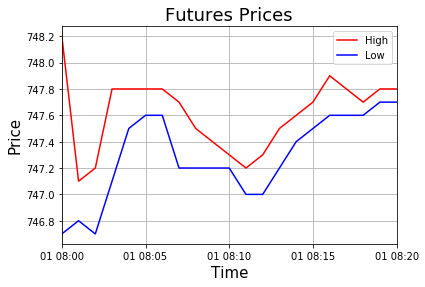

In [27]:
fig = plt.figure()
plt.plot(df2.index,df2['high'],label='High', color='red')
plt.plot(df2.index,df2['low'],label='Low', color='blue')
plt.xlabel('Time', size=15)
plt.ylabel('Price',size=15)
plt.legend()
plt.xlim(df2.index[0],df2.index[-1])
plt.title('Futures Prices',size=18)
plt.grid()
plt.show()

Matplotlib will try to condense the information on the axis labels to remove anything unnecessary.  In our case, since all of the prices happen on the same day, it will just display the time.  It's often easier to read datetimes as axis labels if they're tilted slightly; this can be accomplished using the command `fig.autofmt_xdate()`, which will auto-format datetimes that appear as x-axis labels.

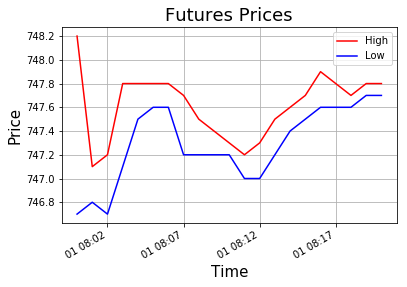

In [28]:
fig = plt.figure()
plt.plot(df2.index,df2['high'],label='High', color='red')
plt.plot(df2.index,df2['low'],label='Low', color='blue')
plt.xlabel('Time', size=15)
plt.ylabel('Price',size=15)
plt.legend()
plt.title('Futures Prices',size=18)
plt.grid()
fig.autofmt_xdate()
plt.show()

As another example using dates instead of times:

In [29]:
df3 = pd.DataFrame({'Temperature':np.random.randint(10,32,30)},index=pd.date_range('2016-06-01',periods=30,freq='12H'))

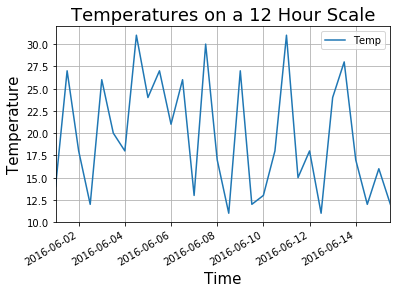

In [30]:
fig = plt.figure()
plt.plot(df3.index,df3['Temperature'],label='Temp')
plt.xlabel('Time', size=15)
plt.ylabel('Temperature',size=15)
plt.legend()
plt.title('Temperatures on a 12 Hour Scale',size=18)
plt.grid()
plt.tick_params(axis='x', labelsize=10)
plt.xlim(df3.index[0],df3.index[-1])
fig.autofmt_xdate()
plt.show()

Compare it to leaving the dates horizontal, with a larger font-sized tick label:

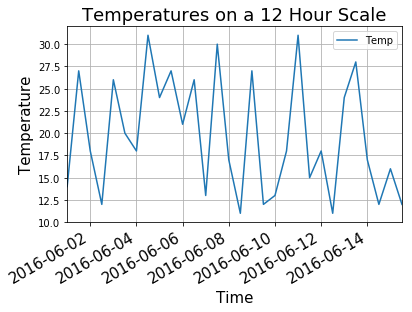

In [32]:
fig = plt.figure()
plt.plot(df3.index,df3['Temperature'],label='Temp')
plt.xlabel('Time', size=15)
plt.ylabel('Temperature',size=15)
plt.legend()
plt.title('Temperatures on a 12 Hour Scale',size=18)
plt.grid()
plt.tick_params(axis='x', labelsize=10)
plt.xlim(df3.index[0],df3.index[-1])
plt.tick_params(axis='x', labelsize=15)
fig.autofmt_xdate()
#fig.autofmt_xdate()
plt.show()

### Markers

For broken-line graphs, like we've been seeing, we can emphasize our actual data points by placing markers at their locations.  A few common markers are (`"."`,point),(`","`,pixel),(`"o"`,circle), and (`"D"`,diamond).  Alternatively, we can specify the linestyle as `.-` which gives a solid line graph with dots:

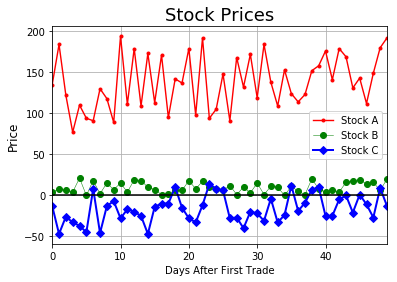

In [33]:
fig = plt.figure()
plt.plot(df1.index,df1['A'],'.-',label='Stock A', color='red',linewidth=1.4)
plt.plot(df1.index,df1['B'],label='Stock B',marker='o' ,color='green',linewidth=0.5)
plt.plot(df1.index,df1['C'],label='Stock C',marker='D', color='blue',linewidth=2)
plt.plot(df1.index,0*df1.index,color='black')
plt.xlabel('Days After First Trade', size=10)
plt.ylabel('Price',size=12)
plt.legend()
plt.title('Stock Prices',size=18)
plt.grid(b=True)
plt.xlim(0,49)
plt.show()

For a list of markers, please see:
https://matplotlib.org/api/markers_api.html

### Graphing Functions

The examples we have looked at involve us graphing discrete data sets.  How would we try to graph a continuous function, like $\sin(x)$, or $e^{-x^2/2}$?  The answer is we have to create a series of data points for Matplotlib to use as the x-axis, fine enough so that when it interpolates between the points with lines, it's not noticeable to the eye.

To accomplish this, we're going to use the `np.arange()` function (note:  it's not "arrange", it's a range).  This function will produce a sequence of evenly space points, with syntax `np.arange(start,end,step)`.

In [35]:
np.arange(0,10,0.5)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

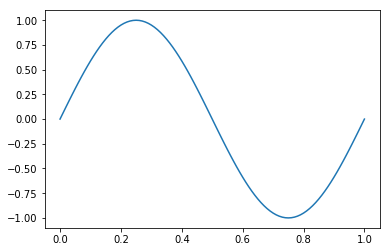

In [36]:
t = np.arange(0.0, 1.0+0.01, 0.01)
s = np.sin(2*np.pi * t)
plt.plot(t, s)
plt.show()

What would happen if we had changed the step size from 0.01 to 0.1?

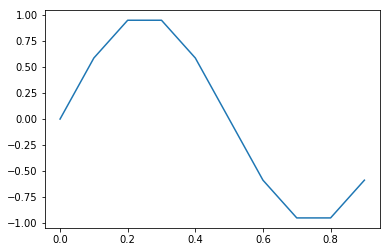

In [38]:
t = np.arange(0.0, 1.0, 0.1)
s = np.sin(2*np.pi * t)
plt.plot(t,s)
plt.show()

We could also make it look more like a graph appearing in a math textbook in the same way we've adjusted other graphs:

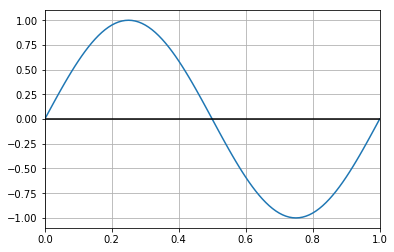

In [39]:
t = np.arange(0.0, 1.0+0.01, 0.01)
s = np.sin(2*np.pi * t)
plt.plot(t, s)
plt.plot(t,0*t,color='black')
plt.xlim(0,1)
plt.grid()
plt.show()

Keeping the step to a hundredth of the total range works well, as a rule of thumb, to keep the graph looking smooth:

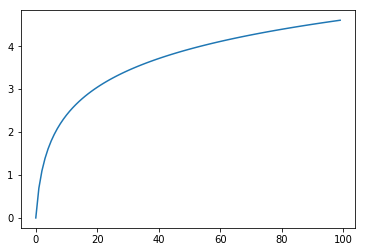

In [41]:
t = np.arange(1.0, 100.0+1, 1)
l = np.log(t/2)
plt.plot(np.log(t))
plt.show()

Compare to the step size a tenth of the one above:

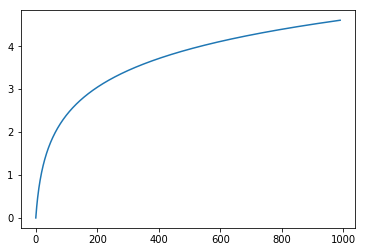

In [42]:
t = np.arange(1.0, 100.0+0.1, 0.1)
l = np.log(t/2)
plt.plot(np.log(t))
plt.show()

These tools will allow us to graph both data sets and mathematical functions on the same graph, which will be a good way to visually inspect any models we create.

### Outputting Files

We can write any graph we make to a file, for use in other aspects of projects.  To accomplish this, replace `plt.show()` with the command `plt.savefig('filepath')`.  One thing to note is the default size of the picture file that is generated is fairly small, but we can control it by setting the dpi.  Let's compare the default with an adjusted output using a previous example:

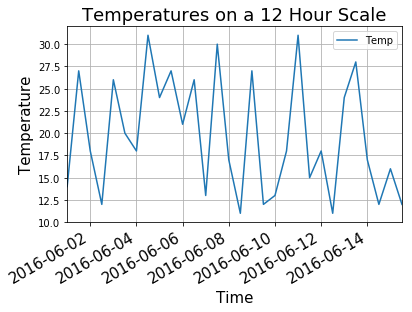

In [43]:
fig = plt.figure()
plt.plot(df3.index,df3['Temperature'],label='Temp')
plt.xlabel('Time', size=15)
plt.ylabel('Temperature',size=15)
plt.legend()
plt.title('Temperatures on a 12 Hour Scale',size=18)
plt.grid()
plt.tick_params(axis='x', labelsize=10)
plt.xlim(df3.index[0],df3.index[-1])
plt.tick_params(axis='x', labelsize=15)
fig.autofmt_xdate()
plt.savefig('c:\\users\\Patrick\\default_dpi.png')

my_dpi=96
plt.savefig('c:\\users\\Patrick\\adjusted_dpi.png',dpi=my_dpi*2)


The resolution of the default is 864x720, whereas the adjusted is 2304x1920.

### Subplots

One nice feature of Matplotlib is the ability to output multiple graphs in the same image.  This is accomplished using  `gridspec` to create subplots:  we first declare the size of the subplots with `GridSpec(rows,columns)`, and then we plot our individual plots using `plt.subplot2grid()` with the following syntax:

`GridSpec(number of rows, number of columns)`<br>
`plt.subplot2grid((grid rows, grid columns), (plot row position, plot column position))`<br>
`plt.plot(x,y)`

We'll plot both the high and the low from `df2`, with one stacked on top of the other; this means we have 2 rows, and 1 column, and the positions will be `(0,0)` and `(1,0)` (since we count from 0):

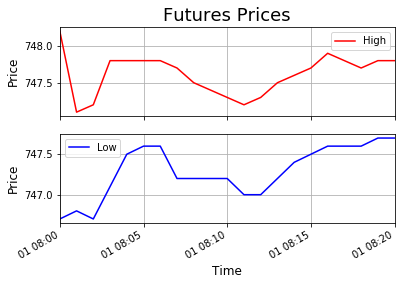

In [44]:
import matplotlib.gridspec as gridspec

fig = plt.figure()
# set up subplot grid; how many rows and columns
gridspec.GridSpec(2,1)

plt.subplot2grid((2,1), (0,0))  # (2,1) = total plot size, (0,0) = coordinates for *this* plot
plt.plot(df2.index,df2['high'],label='High', color='red')
plt.xlabel('Time', size=12)
plt.ylabel('Price',size=12)
plt.legend()
plt.xlim(df2.index[0],df2.index[-1])
plt.title('Futures Prices',size=18)
plt.grid()
fig.autofmt_xdate()

plt.subplot2grid((2,1), (1,0))
plt.plot(df2.index,df2['low'],label='Low', color='blue')
plt.xlabel('Time', size=12)
plt.ylabel('Price',size=12)
plt.legend()
plt.xlim(df2.index[0],df2.index[-1])
plt.grid()
fig.autofmt_xdate()

plt.show()

We can even make more complicated arrangements by stretching graphs over multiple columns.  We'll make a subplot of the volume, open, and close prices; the volume will by 2x2 rows and columns, and each of the open and close will be 1x1 underneath.  We stretch by<br> `plt.subplot2grid((r1,c1),(px,py),colspan=n,rowspan=m)`:

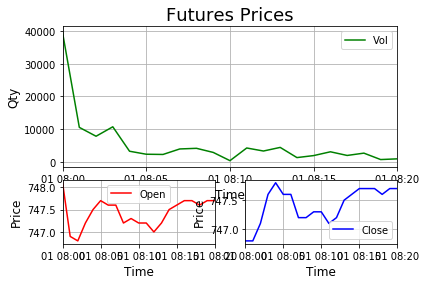

In [46]:
gridspec.GridSpec(3,2)

# Three rows, two columns.  The volume will be at position (0,0) and will span 2 rows and 2 columns.  The open and close 
# will be at positions (2,0) and (2,1), and will be normal sized.
plt.subplot2grid((3,2), (0,0),colspan=2,rowspan=2)
plt.plot(df2.index,df2['volume'],label='Vol', color='green')
plt.xlabel('Time', size=12)
plt.ylabel('Qty',size=12)
plt.legend()
plt.xlim(df2.index[0],df2.index[-1])
plt.title('Futures Prices',size=18)
plt.grid()

plt.subplot2grid((3,2), (2,0))
plt.plot(df2.index,df2['open'],label='Open', color='red')
plt.xlabel('Time', size=12)
plt.ylabel('Price',size=12)
plt.legend()
plt.xlim(df2.index[0],df2.index[-1])
plt.grid()
fig.autofmt_xdate()

plt.subplot2grid((3,2), (2,1))
plt.plot(df2.index,df2['close'],label='Close', color='blue')
plt.xlabel('Time', size=12)
plt.ylabel('Price',size=12)
plt.legend()
plt.xlim(df2.index[0],df2.index[-1])
plt.grid()
fig.autofmt_xdate()

plt.show()

How would we plot these three using 2 rows and 2 columns, stretching the volume vertically, and having the open & close unstretched and vertically stacked to the right of the volume?

### Basic 3d Plotting

Matplotlib has the capability to display three-dimensional plots with relatively easy syntax.  We'll look at a few examples with the goal to setting up multiple-linear regression visualizations in the first modelling unit.  The first thing we need to do is import the 3d packages from matplotlib.

In [47]:
import mpl_toolkits.mplot3d as m3d

Just as we defined a variable name, like `fig`, to be a `plt.figure()` object and then specified the parameters of the graph we wanted, we define a variable name to be a `m3d.Axes3D(plt.figure())` object for 3d plots.  One type of plot we could do is a scatter plot, wherein we specify the $x, y,$ and $z$ coordinates with numpy/pandas objects.

Load the data from the `3d_scatter.csv`.

In [48]:
df3d = pd.read_csv('3d_scatter.csv')

Looking at the data, we see it's arranged as $x,y,z$ coordinates.  We can feed the columns directly into the plotting function.

In [49]:
df3d.head()

,x,y,z
0,-6.987151,-1.568594,0.355416
1,-4.128286,-2.721317,2.320373
2,-6.067860,-2.244291,0.962023
3,-4.680424,-1.539562,-0.045471
4,-4.442910,-0.624020,0.700372


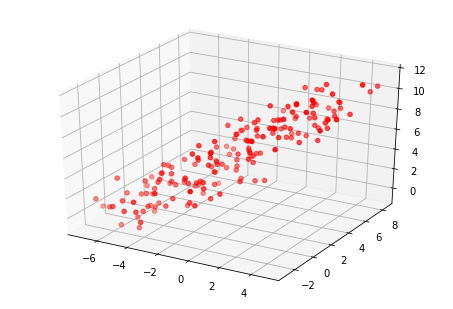

In [50]:
fig3d = m3d.Axes3D(plt.figure())
fig3d.scatter3D(df3d['x'],df3d['y'],df3d['z'], color='red')
plt.show()

We can rotate the view by using `.view_init(elevation,azimuth)`, with the values given in degrees.

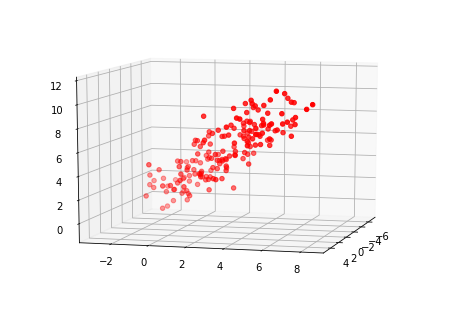

In [51]:
fig3d = m3d.Axes3D(plt.figure())
fig3d.scatter3D(df3d['x'],df3d['y'],df3d['z'], color='red')
fig3d.view_init(10, 15)
plt.show()

We can create datasets directly, and then plot them.  Using the `arange()` function, let's create a set of data for the $x$ coordiate:

In [52]:
X = np.arange(-4,4,0.005)

We'll define $y$ to be a function of $x$, and then $z$ to be a function of them both.  For example:

In [53]:
Y = X**2-1
Z = np.sin(X+Y)

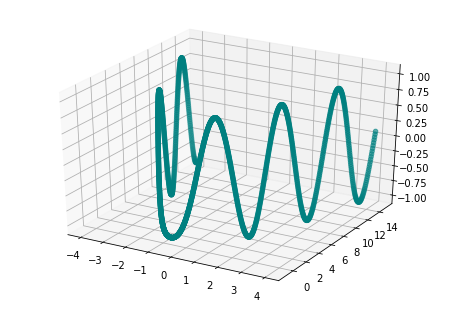

In [54]:
fig3d = m3d.Axes3D(plt.figure())
fig3d.scatter3D(X,Y,Z, color='teal')
plt.show()

Another interesting thing can do is create a wireframe surface.  This is accomplished by created a *meshgrid* that weaves $x$ and $y$ coordinates together in a way that matplotlib can interpret as the $xy$-plane, so that the $z$ coordinates can be defined for any point in the $xy$ ranges we give it.  The syntax is `np.meshgrid(x-values,y-values)` (numpy objects, such as `arange`, etc.), and it returns two sets of values:

In [55]:
x = np.arange(0,5,1)
y = np.arange(-2,2,1)
np.meshgrid(x, y)

[array([[0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4],
        [0, 1, 2, 3, 4]]), array([[-2, -2, -2, -2, -2],
        [-1, -1, -1, -1, -1],
        [ 0,  0,  0,  0,  0],
        [ 1,  1,  1,  1,  1]])]

Recalling that the equation of a plane in $\mathbb{R}^3$ is given by $z=ax+by+c$ for real number $a,b,c$, we can create a wireframe plane using `plot_wireframe(x,y,z)`.  We `meshgrid` some $x,y$ coordinates, and then define $z= x+1.5y+2$:

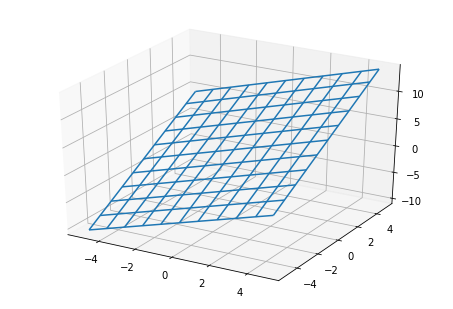

In [56]:
x = np.arange(-5,5,0.1)
y = np.arange(-5,5,0.1)
xx, yy = np.meshgrid(x, y)
Z = xx + 1.5*yy + 2
figplane = m3d.Axes3D(plt.figure())
figplane.plot_wireframe(xx, yy, Z, rstride=10, cstride=10);
plt.show();

The rstride and cstride control the array row stride step size and array column stride step size respectively.  They default to 1, and that would give us the following:

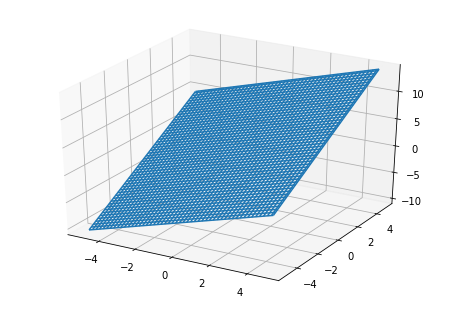

In [57]:
figplane = m3d.Axes3D(plt.figure())
figplane.plot_wireframe(xx, yy, Z);
plt.show();

### More Matplotlib

What we've seen so far only scratches the surface of what Matplotlib can accomplish.  Here are two examples from their gallery that display some of the possibilities:

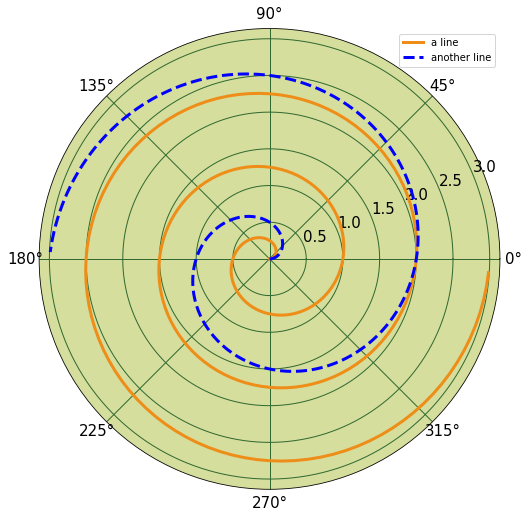

In [58]:
# radar green, solid grid lines
rc('grid', color='#316931', linewidth=1, linestyle='-')
rc('xtick', labelsize=15)
rc('ytick', labelsize=15)

# force square figure and square axes looks better for polar
fig = figure(figsize=(8, 8))
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8],
                  projection='polar', facecolor='#d5de9c')

r = np.arange(0, 3.0, 0.01)
theta = 2*np.pi*r
ax.plot(theta, r, color='#ee8d18', lw=3, label='a line')
ax.plot(0.5*theta, r, color='blue', ls='--', lw=3, label='another line')
ax.legend()

show()

This is an example of a polar-coordinate plot; instead of specifying a point in space by its $(x,y)$ coordinate, we can instead specify it by $(r,\theta)$, where $r$ is the (Euclidean) distance from the origin $(0,0)$ to the point and $\theta$ is the angle from the $0^o$ line to the point.  Polar coordinates are often used in navigation, as well as for more theoretical objects like complex numbers.

/Users/scotthsieh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  
/Users/scotthsieh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


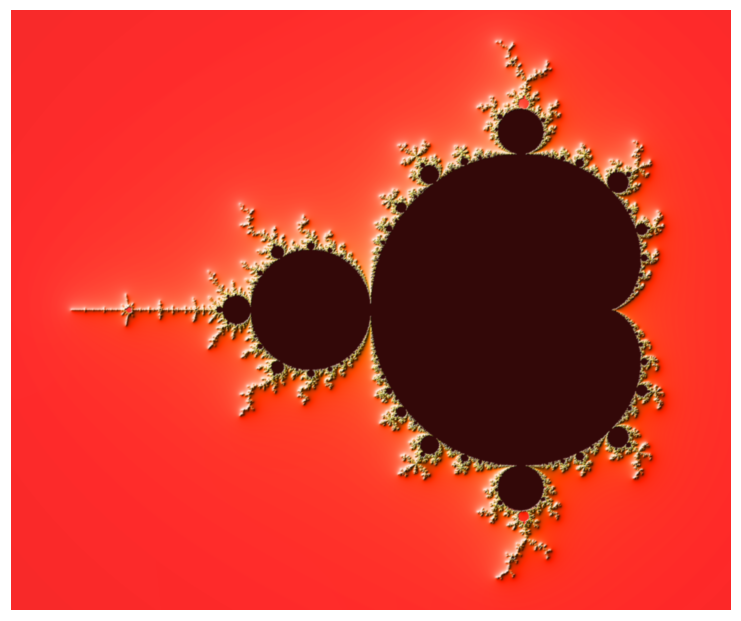

In [59]:
def mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon=2.0):
    X = np.linspace(xmin, xmax, xn, dtype=np.float32)
    Y = np.linspace(ymin, ymax, yn, dtype=np.float32)
    C = X + Y[:, None]*1j
    N = np.zeros(C.shape, dtype=int)
    Z = np.zeros(C.shape, np.complex64)
    for n in range(maxiter):
        I = np.less(abs(Z), horizon)
        N[I] = n
        Z[I] = Z[I]**2 + C[I]
    N[N == maxiter-1] = 0
    return Z, N



import time
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt

xmin, xmax, xn = -2.25, +0.75, 3000/2
ymin, ymax, yn = -1.25, +1.25, 2500/2
maxiter = 200
horizon = 2.0 ** 40
log_horizon = np.log(np.log(horizon))/np.log(2)
Z, N = mandelbrot_set(xmin, xmax, ymin, ymax, xn, yn, maxiter, horizon)

# Normalized recount as explained in:
# https://linas.org/art-gallery/escape/smooth.html
# https://www.ibm.com/developerworks/community/blogs/jfp/entry/My_Christmas_Gift

# This line will generate warnings for null values but it is faster to
# process them afterwards using the nan_to_num
with np.errstate(invalid='ignore'):
    M = np.nan_to_num(N + 1 -
                      np.log(np.log(abs(Z)))/np.log(2) +
                      log_horizon)

dpi = 72
width = 10
height = 10*yn/xn
fig = plt.figure(figsize=(width, height), dpi=dpi)
ax = fig.add_axes([0.0, 0.0, 1.0, 1.0], frameon=False, aspect=1)

# Shaded rendering
light = colors.LightSource(azdeg=315, altdeg=10)
M = light.shade(M, cmap=plt.cm.hot, vert_exag=1.5,
                norm=colors.PowerNorm(0.3), blend_mode='hsv')
plt.imshow(M, extent=[xmin, xmax, ymin, ymax], interpolation="bicubic")
ax.set_xticks([])
ax.set_yticks([])

plt.show()

The graph above is of the *Mandelbrot set*, an example of a fractal.  Fractal objects exhibit repeating patterns as you "zoom in" on them.  Fractals exist in nature as well:
 <img src="http://i.imgur.com/Rtqdatv.jpg",width=500,height=500>


Matplotlib has very capable tools for handling other kinds of three-dimensional plots.  Surface plots are very handy for visualizing *cost functions* $f:\mathbb{R}^2\to\mathbb{R}$, which we will talk about briefly in unit 10.  We won't be learning this in-depth, but will present one of the Matplotlib 3d examples here to show off its capabilities:

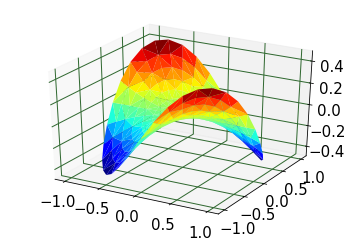

In [60]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

n_angles = 36
n_radii = 8

# An array of radii
# Does not include radius r=0, this is to eliminate duplicate points
radii = np.linspace(0.125, 1.0, n_radii)

# An array of angles
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords
# (0, 0) is added here. There are no duplicate points in the (x, y) plane
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Pringle surface
z = np.sin(-x*y)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, cmap=cm.jet, linewidth=0.2)

plt.show()

## Bokeh

Most of the plotting we will do in this course will be with Matplotlib, but we will have a short look at Bokeh with an aim to easily creating interactive plots.  This graphing package comes with many tools for interactivity, including zooming, selecting, panning, and more.  This will let us get a "closer look" at the data we're graphing.

In [61]:
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.models import DatetimeTickFormatter

In [62]:
output_notebook()

Loading BokehJS ...

The general syntax for a Bokeh plot is as follows:
1. Define the `TOOLS` you want (e.g.:pan, wheel_zoom, etc.).
2. Declare a variable name for the `figure()`, like we did with `plt.figure()`.
3. Feed `figure()` arguments for your graph, such as `title`, `plot_width` or `height`, and `tools=TOOLS`.
4. Define the `xaxis` and `yaxis` `.axis_labels`.
5. Decide what kind of plot you want (e.g.: `line`,`scatter`, etc.), and declare what your x and y axes will be.
6. Call `show(variable_name)` to display the graph

So if we were going to plot the open prices from df2 as a line graph, we would write:

In [64]:
TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p1 = figure(title="Futures Prices", tools=TOOLS,x_axis_type='datetime', plot_width=900, plot_height=700)
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'
p1.line(df2.index, df2['open'], legend="Open")
show(p1)

Try moving the graph around, zooming with box-zoom or wheel zoom, and then using the reset button to return the graph to its original position.

We can graph high and low again using:

In [66]:
TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p1 = figure(title="Futures Prices", tools=TOOLS,x_axis_type='datetime', plot_width=900, plot_height=700)
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'
p1.line(df2.index, df2['high'], legend="High",color='red')
p1.line(df2.index, df2['low'], legend="Low",color='blue')
show(p1)

We can also put plots side-by-side again, using the `gridplot` from `bokeh.layouts`.  We define all of our figures, and then when we call the `show()` function, we pass it a list of lists of our plots.  

In [67]:
from bokeh.layouts import gridplot

TOOLS = "pan,wheel_zoom,box_zoom,reset,save"

p1 = figure(title="Futures Prices", tools=TOOLS,x_axis_type='datetime')
p1.xaxis.axis_label = 'Date'
p1.yaxis.axis_label = 'Price'
p1.line(df2.index, df2['high'], legend="High")

p2 = figure(title="Futures Prices", tools=TOOLS,x_axis_type='datetime')
p2.xaxis.axis_label = 'Date'
p2.yaxis.axis_label = 'Price'
p2.line(df2.index, df2['low'], legend="Low")


show(gridplot([[p1,p2]], plot_width=400, plot_height=300))

In [68]:
show(gridplot([p1],[p2], plot_width=600, plot_height=300))

Again, this sort of plotting barely scratches the surface of what Bokeh is capable of.  Here is one of the front-page examples from their gallery, creating a scatter plot of different sized discs with a range of colours:

In [70]:
N = 4000
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = [
    "#%02x%02x%02x" % (int(r), int(g), 150) for r, g in zip(50+2*x, 30+2*y)
]

TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"

p = figure(tools=TOOLS,plot_width=800, plot_height=800)

p.scatter(x, y, radius=radii,
          fill_color=colors, fill_alpha=0.6,
          line_color=None)
show(p)

# Assignment 4

1. 1. To see some of the issues with calling `.plot()` on an entire dataframe without considering carefully what the columns contain, try `df2.plot()` using the `df2` dataframe of prices from above.  Why does this occur?  
  2. Create a vertically stacked set of two graphs using `df2`:  the top graph will contain all of the price data together, and the bottom graph will contain the volume data.  Choose different colours for each data set.  (Note: you can use hex colour codes when defining colours, e.g.: `color=#19F0B9`.  You can use the following RGB to Hex converter http://www.rgbtohex.net/)
  
2. Use the file customer_data.csv to perform the exercise.    
  1. Create a new DataFrame called construction which contains all the customers in the "Construction" industry with over 0 spend on mobility products. Using this DataFrame, create a scatterplot with Mobility revenue on the vertical axis and number of employees on the horizontal axis. Does this tell you anything about the relationship between Mobility revenue and number of employees? What does it tell you?
   2. Copy the code from part (1) and add in two lines underneath: plt.xscale('log') and plt.yscale('log'). These two lines rescale the axes so that instead of showing the raw figures, the logarithm of the figures is shown instead. This is often a useful transformation for data that is extremely skewed. How does the rescaled plot differ from the plot you created in part 1? Why? Can you discern anything about the relationship between Mobility revenue and number of employees that you couldn't before?
   3. Repeat parts (1) and (2) for the Agriculture industry. How does the relationship between Mobility and number of employees differ in this industry from the Construction industry? Why do you think that might be?

3. 1. Create a 3d scatter plot where the $x$-values range from $-2$ to $4$, the $y$-values are the cosine-squared of $x$, and the $z$ values are the sine of the difference of $x$ and $y$.  Set the step size for $x$ to be at most $0.01$.  
   2. Using the `meshgrid` method, graph a wireframe *hyperbolic paraboloid* for $a=\sqrt{3}$, $b=2$.  (Have the $xy$ values range from at least $-10$ to $10$ to see the structure properly.)

## Question 1

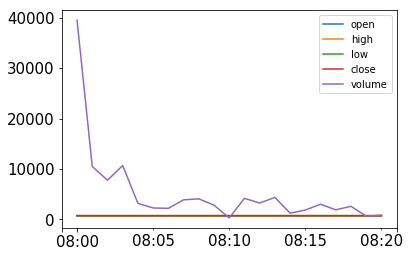

In [71]:
df2.plot()

In [72]:
df2 = pd.read_csv('timeseries_1.csv',index_col=0,parse_dates=True)
df2.head()

,open,high,low,close,volume
2014-02-01 08:00:00,748.1,748.2,746.7,746.8,39470
2014-02-01 08:01:00,746.9,747.1,746.8,746.8,10498
2014-02-01 08:02:00,746.8,747.2,746.7,747.1,7782
2014-02-01 08:03:00,747.2,747.8,747.1,747.6,10678
2014-02-01 08:04:00,747.5,747.8,747.5,747.8,3194


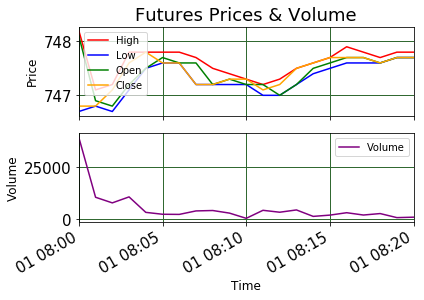

In [73]:
import matplotlib.gridspec as gridspec

fig = plt.figure()
# set up subplot grid; how many rows and columns
gridspec.GridSpec(2,1)

plt.subplot2grid((2,1), (0,0))  # (2,1) = total plot size, (0,0) = coordinates for *this* plot
plt.plot(df2.index,df2['high'],label='High', color='red')
plt.plot(df2.index,df2['low'],label='Low', color='blue')
plt.plot(df2.index,df2['open'],label='Open', color='green')
plt.plot(df2.index,df2['close'],label='Close', color='orange')
plt.xlabel('Time', size=12)
plt.ylabel('Price',size=12)
plt.legend()
plt.xlim(df2.index[0],df2.index[-1])
plt.title('Futures Prices & Volume',size=18)
plt.grid()
fig.autofmt_xdate()

plt.subplot2grid((2,1), (1,0))
plt.plot(df2.index,df2['volume'],label='Volume', color='purple')
plt.xlabel('Time', size=12)
plt.ylabel('Volume',size=12)
plt.legend()
plt.xlim(df2.index[0],df2.index[-1])
plt.grid()
fig.autofmt_xdate()

plt.show()